# Holopix50k visualization

This notebook provides a small visualization of diverse image pairs in the Holopix50k dataset.

### Holopix50k downloader

The next cell defines a class to download Holopix50k image pairs required for the dataset visualization.

In [1]:
import os
from urllib.request import urlretrieve


class Holopix50kDownloader:
    def __init__(
        self,
        holopix50k_bucket="holopix50k-dataset",
        holopix50k_root="Holopix50k",
        base_download_url="https://storage.googleapis.com/",
        holopix50k_train_ids="../holopix50k_ids/holopix50k_train_ids.txt",
        holopix50k_test_ids="../holopix50k_ids/holopix50k_test_ids.txt",
        holopix50k_val_ids="../holopix50k_ids/holopix50k_val_ids.txt"
    ):
        self.holopix50k_bucket = holopix50k_bucket
        self.holopix50k_root = holopix50k_root
        self.base_download_url = base_download_url
        self.holopix50k_split_ids = {
            "train": holopix50k_train_ids,
            "test": holopix50k_test_ids,
            "val": holopix50k_val_ids
        }
        self.holopix50k_img_types = ['left', 'right']
        self._read_holopix50k_ids()

    def _read_holopix50k_ids(self):
        self.holopix50k_split_ids_map = dict()
        for split, id_file in self.holopix50k_split_ids.items():
            with open(id_file) as f:
                holopix50k_ids = [line.rstrip() for line in f]
                
            self.holopix50k_split_ids_map[split] = holopix50k_ids
        
    def find_split_from_id(self, id_):
        for split, split_ids in self.holopix50k_split_ids_map.items():
            if id_ in split_ids:
                return split
            else:
                continue

    def download_image_pair(self, id_, save_path, skip_existing=True, basename=None, split=None):
        if not split:
            split = self.find_split_from_id(id_)

        if not basename:
            basename = id_

        for img_type in self.holopix50k_img_types:
            image_path = os.path.join(self.holopix50k_root, split, img_type, "{}_{}.jpg".format(id_, img_type))
            src_file = os.path.join(self.base_download_url, self.holopix50k_bucket, image_path)
            dst_file = os.path.join(save_path, "{}_{}.jpg".format(basename, img_type))
            if not (os.path.exists(dst_file) and skip_existing):
                urlretrieve(src_file, dst_file)

### Holopix50k visualizer

The next cell defines a class to visualize Holopix50k image pairs. You can chose to either animate the left-right image pairs or display images side-by-side.

In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

                
class Holopix50kVisualizer:
    """Holopix50k visualizer class.
    
    Requires a `Holopix50kDownloader` object to download image pairs. 
    """
    def __init__(
        self,
        holopix50k_downloader,
        tmp_save_path="../images/",
    ):
        self.holopix50k_downloader = holopix50k_downloader
        self.tmp_save_path = tmp_save_path
        self.holopix50k_split_ids_map = self.holopix50k_downloader.holopix50k_split_ids_map

    def _get_random_holopix50k_id(self, split=None):
        if split:
            return random.choice(self.holopix50k_split_ids_map[split]), split
        else:
            split = random.choice(list(self.holopix50k_split_ids_map.keys()))
            return random.choice(self.holopix50k_split_ids_map[split]), split

    def __call__(self, side_by_side=False, split=None):
        """Visualizes a random Holopix50k image pair.
        
        Args:
            side_by_side (bool): Boolean to display image pair side-by-side.
            split (str): Holopix50k split to display an image pair from. Available options: train, test, val.
            
        Returns:
            A matplotlib animation object. `None` if viewing side-by-side.
        
        """
        id_, split = self._get_random_holopix50k_id(split)
        self.holopix50k_downloader.download_image_pair(
            id_, 
            self.tmp_save_path, 
            split=split, 
            basename="tmp", 
            skip_existing=False
        )
        
        left = Image.open(os.path.join(self.tmp_save_path, "tmp_left.jpg"))
        right = Image.open(os.path.join(self.tmp_save_path, "tmp_right.jpg"))
        
        if side_by_side:
            fig, axarr = plt.subplots(1, 2, figsize=(10, 6))
            axarr[0].axis("off")
            axarr[1].axis("off")
            axarr[0].set_title("Left", fontdict={'fontsize': 16, 'fontweight': 'medium'})
            axarr[1].set_title("Right", fontdict={'fontsize': 16, 'fontweight': 'medium'})
            axarr[0].imshow(left)
            axarr[1].imshow(right)
            
            return
        else:
            fig = plt.figure(figsize=(8, 5))
            imgs = [
                [plt.imshow(left, animated=True)], 
                [plt.imshow(right, animated=True)]
            ]
            ani = animation.ArtistAnimation(
                fig,
                imgs,
                interval=500,
                blit=True,
            )
            plt.axis("off")
            plt.show()
            
            # Need to return the matplotlib animation object to run 
            # animations outside this function scope.
            return ani

In [3]:
%matplotlib notebook

holopix50k_downloader = Holopix50kDownloader()
holopix50k_visualizer = Holopix50kVisualizer(holopix50k_downloader)

Call the `Holopix50kVisualizer` instance as follows to see animated version of a random left-right image pair

<IPython.core.display.Javascript object>


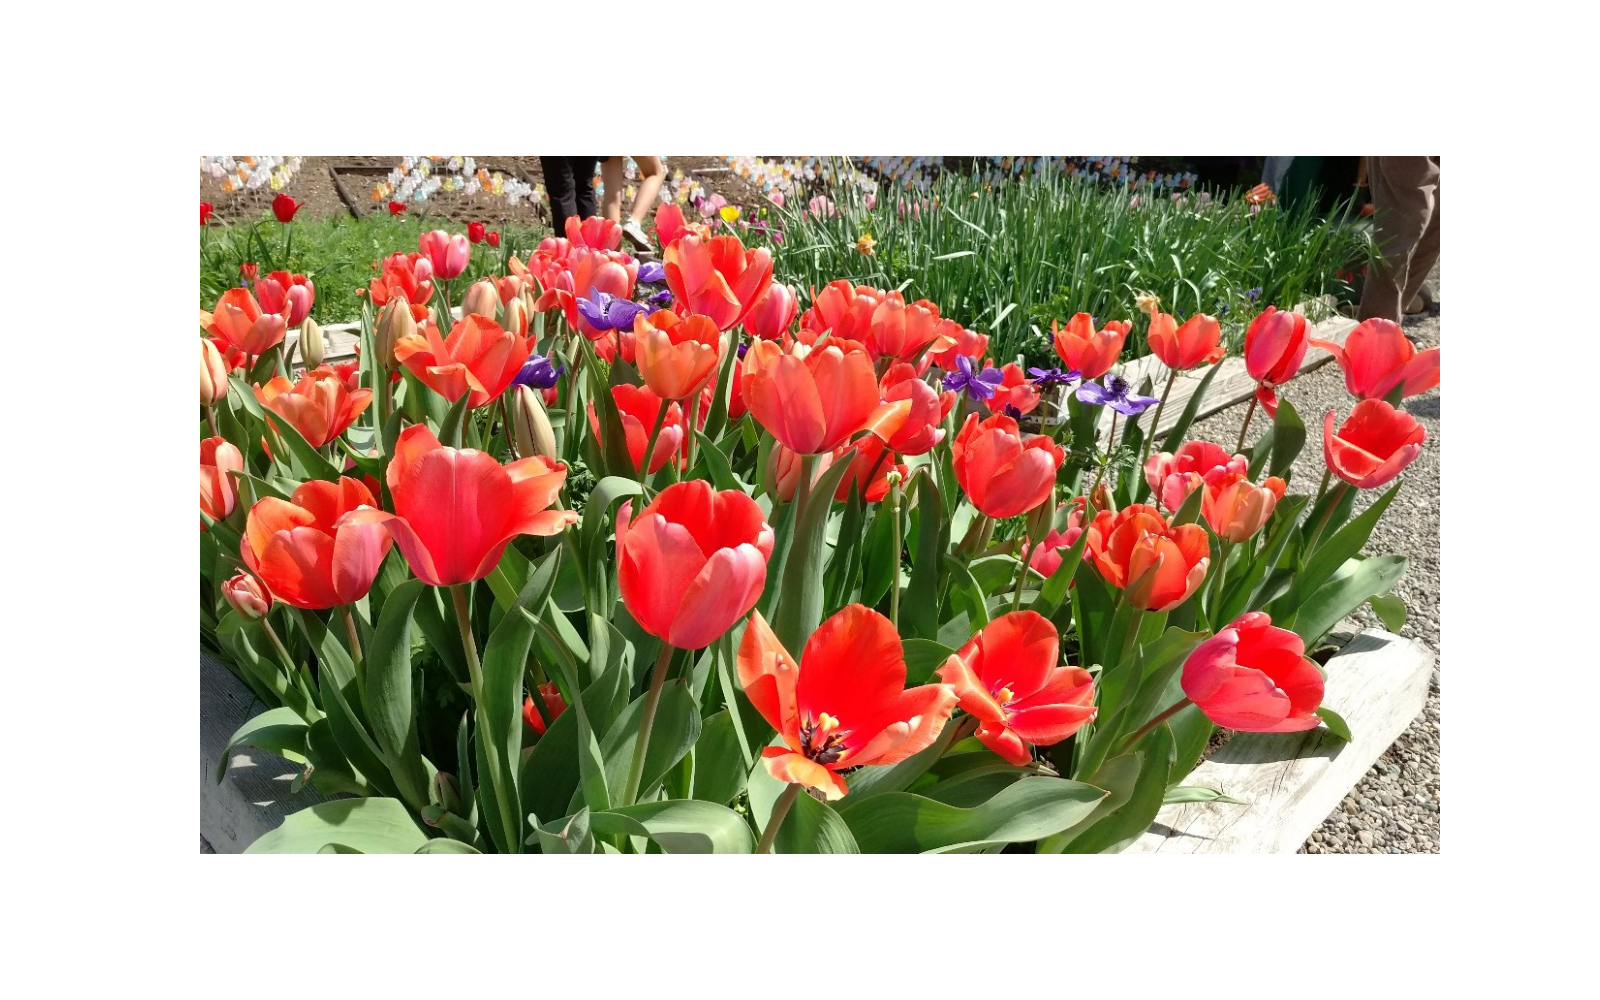

In [80]:
ani = holopix50k_visualizer()

You can also visualize the two images side by side by passing the `side_by_side` boolean as follows

<IPython.core.display.Javascript object>


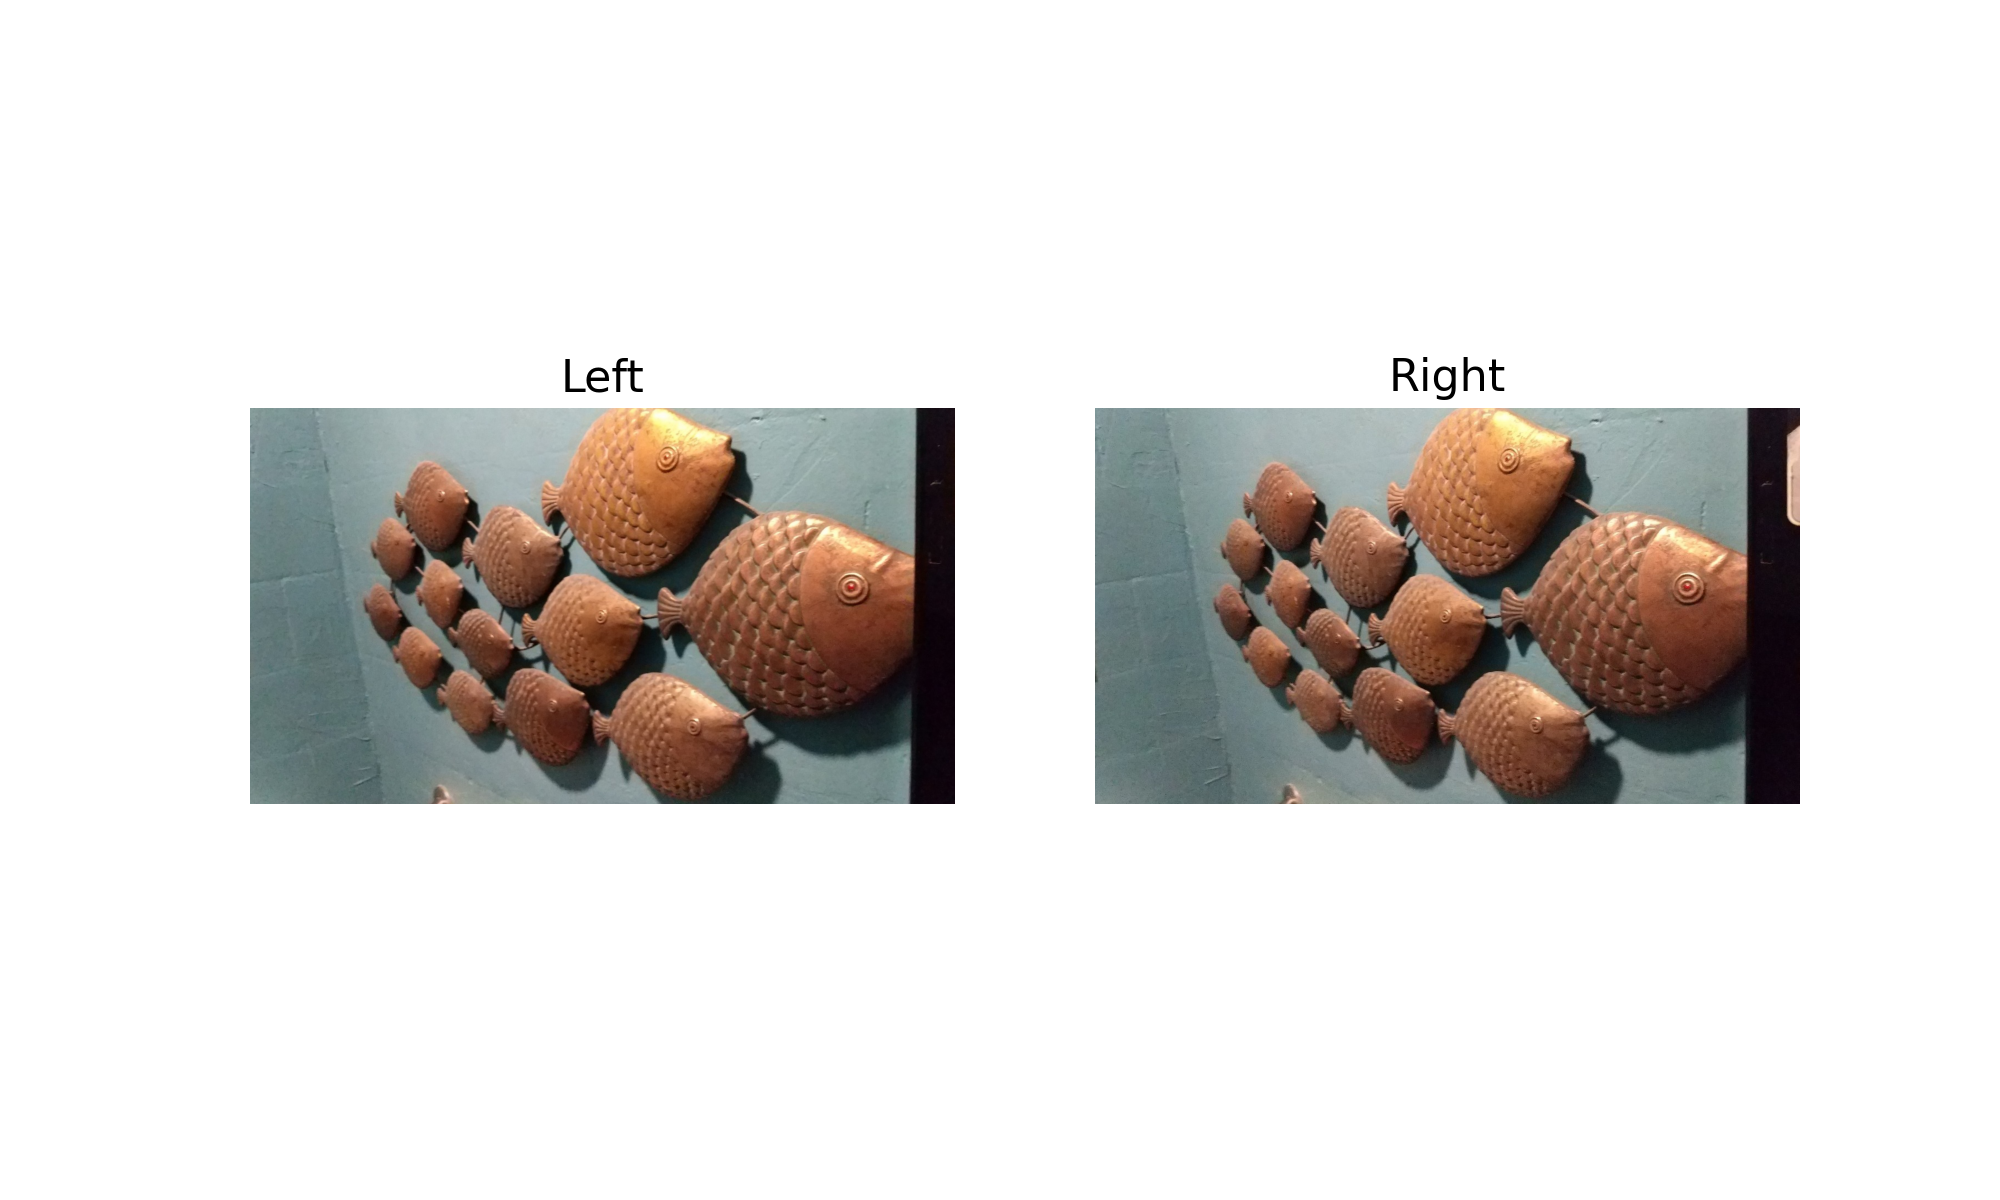

In [115]:
ani = holopix50k_visualizer(side_by_side=True)

To visualize an image pair from a specific split of the Holopix50k dataset, pass the `split` argument while calling the `holopix50k_visualizer` as follows

<IPython.core.display.Javascript object>


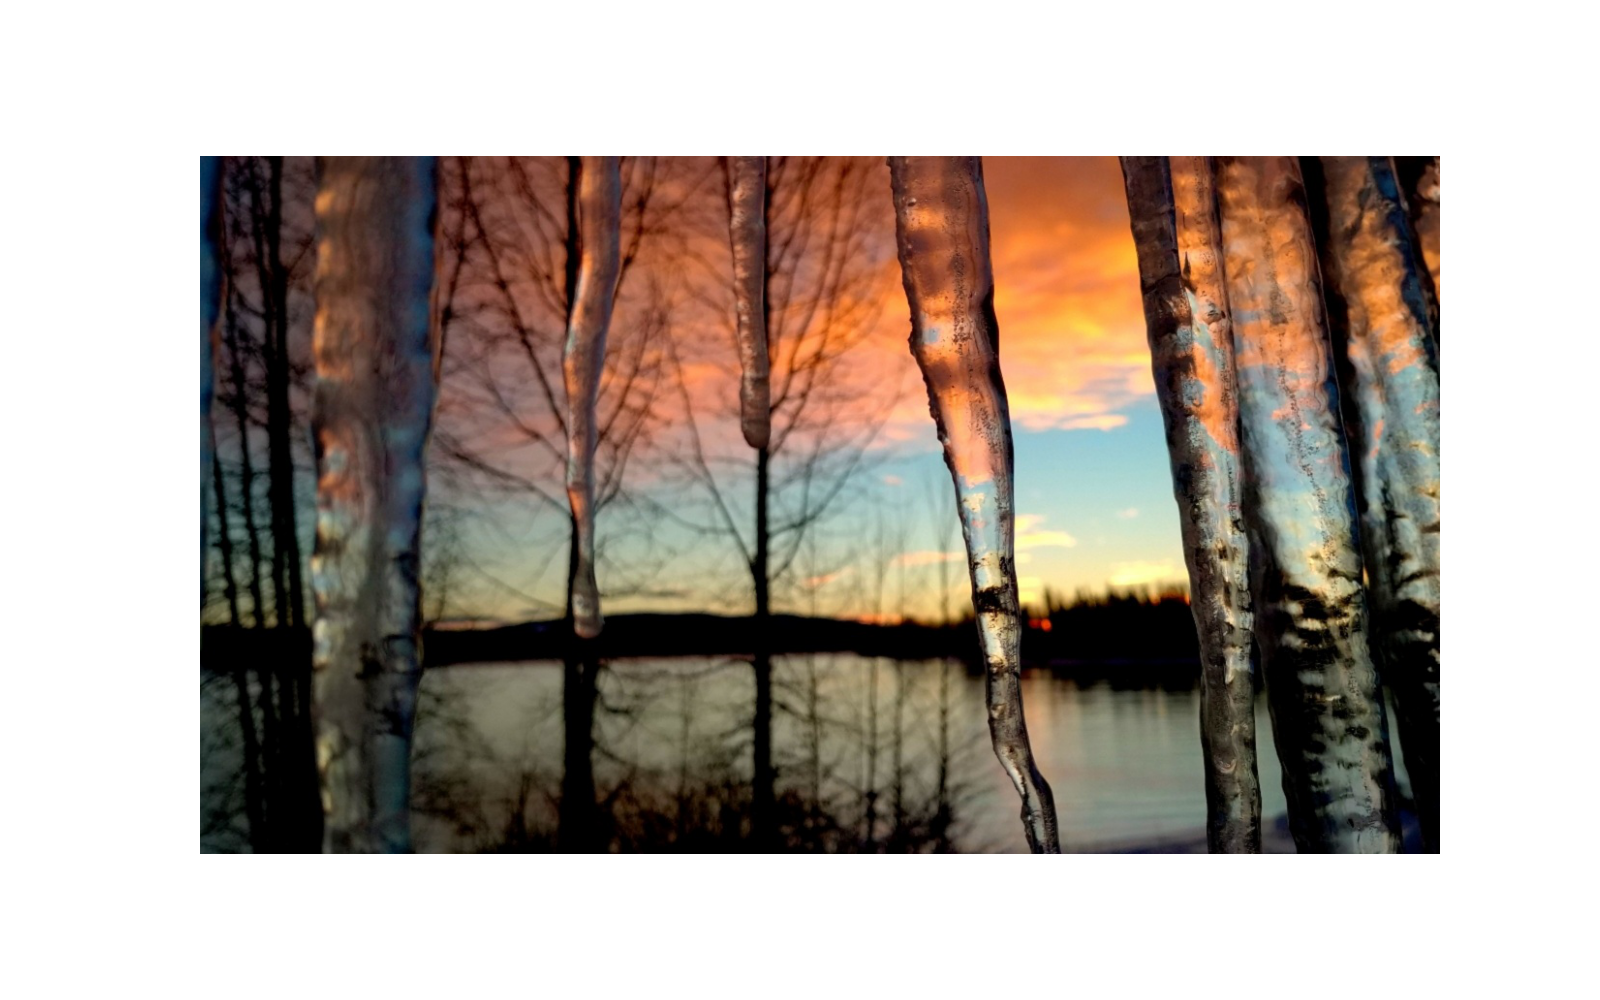

In [140]:
ani = holopix50k_visualizer(split="test")